### Example Code for Airy disk
_Reproducing https://adriftjustoffthecoast.wordpress.com/2013/06/06/2d-fourier-transform-of-the-unit-disk/_

In [38]:
from __future__ import division
import numpy as np
from numpy.fft import fft2, fftfreq, fftshift
from scipy.special import jv, jn
import  matplotlib.pyplot as plt
% matplotlib inline

In [72]:
L = 256 ## domain size
a = 0.5 ## radius of disk
N = 2048 ## grid dimension
sampf = L/N

x = np.linspace(-L/2,L/2,N)
y = np.linspace(-L/2,L/2,N)

X,Y = np.meshgrid(x,y)
R = np.sqrt(X**2+Y**2)

##
disk = (R <= a) * 1

D_ft_ = fft2(disk) * (L/N) * (L/N)
D_ft  = fftshift(D_ft_)

D_FT = abs(D_ft)

In [81]:
##- True Airy disk
kx, ky = fftfreq(N,d=L/N/(2*np.pi)),fftfreq(N,d=L/N/(2*np.pi))
KX, KY = np.meshgrid(fftshift(kx),fftshift(ky))
KR = np.sqrt(KX**2 + KY**2) + 1e-10

Airy_ = 2*np.pi*a**2*jn(1,KR*a) / (KR*a)
Airy_[np.where(KR==0)]=np.pi*a

Airy = abs(Airy_)

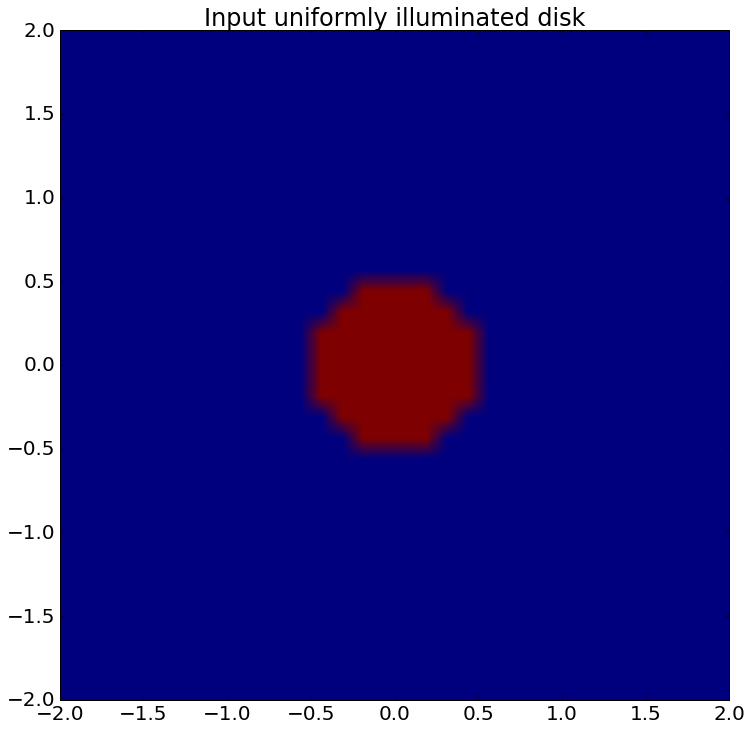

In [74]:
plt.figure(figsize=(12,12))
plt.imshow(disk,extent=(-L/2,L/2,-L/2,L/2))
plt.xlim(-2,2); plt.ylim(-2,2); plt.xticks(fontsize=20); plt.yticks(fontsize=20)
plt.title('Input uniformly illuminated disk', fontsize=24)

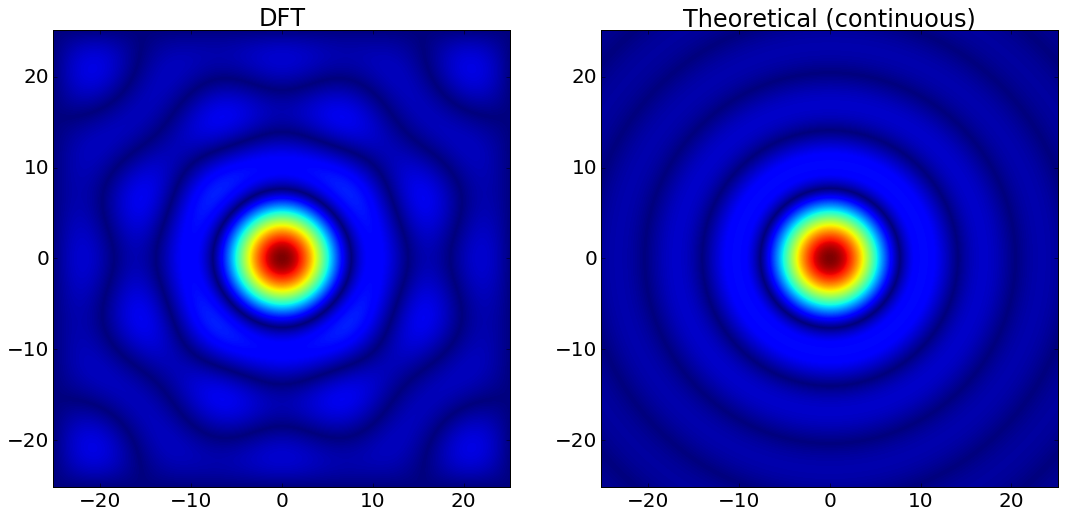

In [82]:
plt.figure(figsize=(18,9))
plt.subplot(121); plt.title('DFT', fontsize=24); plt.xticks(fontsize=20); plt.yticks(fontsize=20)
plt.imshow(D_FT, extent=(np.min(kx),np.max(kx),np.min(ky),np.max(ky)))

plt.subplot(122); plt.title('Theoretical (continuous)', fontsize=24); plt.xticks(fontsize=20); plt.yticks(fontsize=20)
plt.imshow(Airy, extent=(np.min(kx),np.max(kx),np.min(ky),np.max(ky)))